In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/User/Downloads/income.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [3]:
df.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [4]:
age=df["Age"]
income=df["Income($)"]

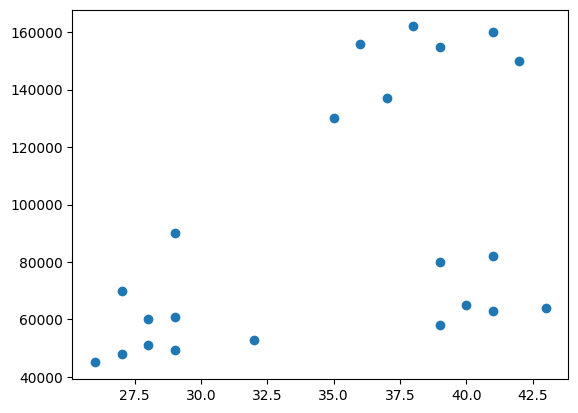

In [5]:
from matplotlib import pyplot as plt
plt.scatter(age,income)

In [6]:
from sklearn.cluster import KMeans
sse=[]
k_range=range(1,len(df))
for k in k_range:
    model=KMeans(n_clusters=k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)

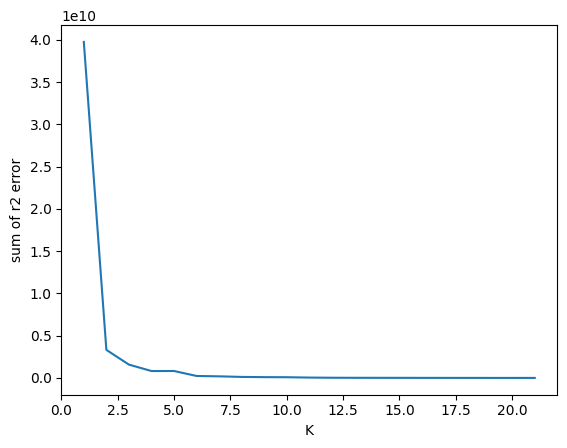

In [7]:
from matplotlib import pyplot as plt
plt.xlabel("K")
plt.ylabel("sum of r2 error")
plt.plot(k_range,sse)

In [8]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [9]:
y_predict=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predict
df.head()
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [10]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

C:\Users\User\AppData\Local\Temp\ipykernel_9044\2147077726.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


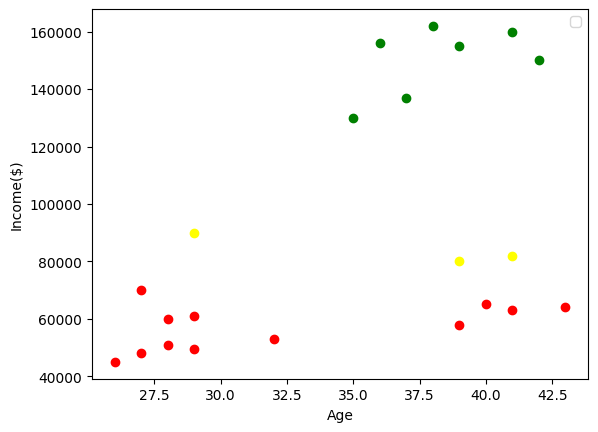

In [11]:
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()
sca.fit(df[['Income($)']])
df["Income($)"]=sca.transform(df[["Income($)"]])
sca.fit(df[["Age"]])
df["Age"]=sca.transform(df[["Age"]])

In [14]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predict
df.head()
centroids=km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

C:\Users\User\AppData\Local\Temp\ipykernel_9044\766443205.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


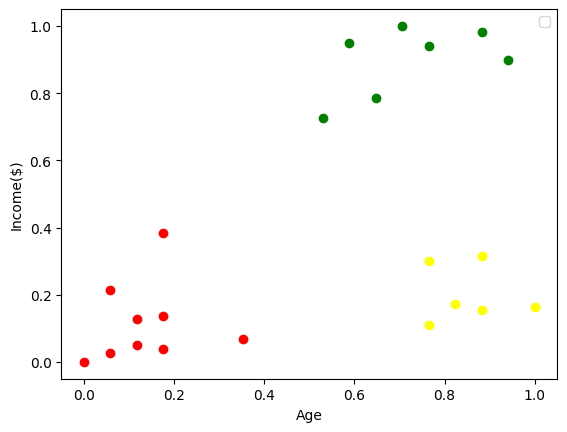

In [15]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9044\4133880432.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


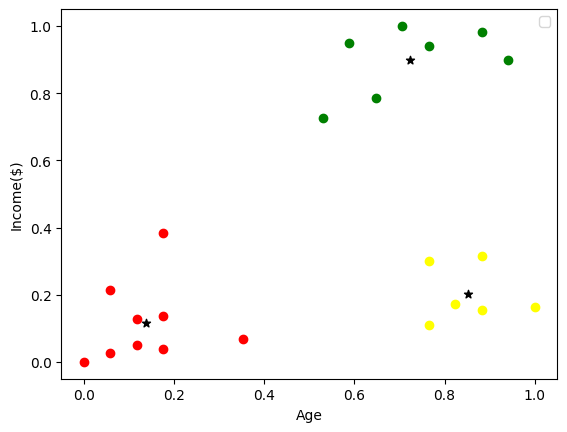

In [16]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
plt.scatter(df1["Age"],df1["Income($)"],color="Red")
plt.scatter(df2["Age"],df2["Income($)"],color="Green")
plt.scatter(df3["Age"],df3["Income($)"],color="Yellow")
plt.scatter(centroids[:,0],centroids[:,1],color="Black",marker="*")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()